In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transforms
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the directory path
data_dir = r"D:\archive (1)\PlantVillage"

# Load the entire dataset
full_dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Define the sizes of each split
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

# Split the dataset into training, validation, and testing sets
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size, test_size])

# Create data loaders for each set
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Print class names
print(full_dataset.classes)

# AlexNet model definition for 64x64 images
class AlexNet(nn.Module):
    def __init__(self, num_classes=15):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


model = AlexNet(num_classes=15).to(device)
print(model)


['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 


Training with learning rate: 0.001


Epoch [1/50], Train Loss: 2.1197, Train Accuracy: 0.2995, Val Loss: 1.3250, Val Accuracy: 0.5521


Epoch [2/50], Train Loss: 1.0652, Train Accuracy: 0.6438, Val Loss: 0.7604, Val Accuracy: 0.7382


Epoch [3/50], Train Loss: 0.7304, Train Accuracy: 0.7495, Val Loss: 0.4930, Val Accuracy: 0.8357


Epoch [4/50], Train Loss: 0.5129, Train Accuracy: 0.8243, Val Loss: 0.3812, Val Accuracy: 0.8701


Epoch [5/50], Train Loss: 0.4054, Train Accuracy: 0.8631, Val Loss: 0.2992, Val Accuracy: 0.8934


Epoch [6/50], Train Loss: 0.3088, Train Accuracy: 0.8945, Val Loss: 0.2551, Val Accuracy: 0.9152


Epoch [7/50], Train Loss: 0.2588, Train Accuracy: 0.9140, Val Loss: 0.2170, Val Accuracy: 0.9341


Epoch [8/50], Train Loss: 0.2015, Train Accuracy: 0.9320, Val Loss: 0.1750, Val Accuracy: 0.9438


Epoch [9/50], Train Loss: 0.1788, Train Accuracy: 0.9385, Val Loss: 0.1736, Val Accuracy: 0.9447


Epoch [10/50], Train Loss: 0.1781, Train Accuracy: 0.9407, Val Loss: 0.2058, Val Accuracy: 0.9331


Epoch [11/50], Train Loss: 0.1367, Train Accuracy: 0.9533, Val Loss: 0.1601, Val Accuracy: 0.9549


Epoch [12/50], Train Loss: 0.1180, Train Accuracy: 0.9604, Val Loss: 0.1295, Val Accuracy: 0.9607


Epoch [13/50], Train Loss: 0.1073, Train Accuracy: 0.9647, Val Loss: 0.1594, Val Accuracy: 0.9496


Epoch [14/50], Train Loss: 0.1172, Train Accuracy: 0.9597, Val Loss: 0.1286, Val Accuracy: 0.9636


Epoch [15/50], Train Loss: 0.1000, Train Accuracy: 0.9635, Val Loss: 0.1551, Val Accuracy: 0.9544


Epoch [16/50], Train Loss: 0.0951, Train Accuracy: 0.9693, Val Loss: 0.1583, Val Accuracy: 0.9583


Epoch [17/50], Train Loss: 0.0684, Train Accuracy: 0.9768, Val Loss: 0.1600, Val Accuracy: 0.9598


Epoch [18/50], Train Loss: 0.0936, Train Accuracy: 0.9687, Val Loss: 0.1536, Val Accuracy: 0.9569


Epoch [19/50], Train Loss: 0.0726, Train Accuracy: 0.9760, Val Loss: 0.1364, Val Accuracy: 0.9627


Epoch [20/50], Train Loss: 0.0844, Train Accuracy: 0.9704, Val Loss: 0.1314, Val Accuracy: 0.9680


Epoch [21/50], Train Loss: 0.0712, Train Accuracy: 0.9767, Val Loss: 0.1096, Val Accuracy: 0.9719


Epoch [22/50], Train Loss: 0.0835, Train Accuracy: 0.9730, Val Loss: 0.1392, Val Accuracy: 0.9607


Epoch [23/50], Train Loss: 0.0705, Train Accuracy: 0.9761, Val Loss: 0.1711, Val Accuracy: 0.9476


Epoch [24/50], Train Loss: 0.0546, Train Accuracy: 0.9818, Val Loss: 0.1681, Val Accuracy: 0.9549


Epoch [25/50], Train Loss: 0.0635, Train Accuracy: 0.9793, Val Loss: 0.0996, Val Accuracy: 0.9729


Epoch [26/50], Train Loss: 0.0651, Train Accuracy: 0.9799, Val Loss: 0.1386, Val Accuracy: 0.9661


Epoch [27/50], Train Loss: 0.0561, Train Accuracy: 0.9801, Val Loss: 0.1120, Val Accuracy: 0.9748


Epoch [28/50], Train Loss: 0.0629, Train Accuracy: 0.9803, Val Loss: 0.1847, Val Accuracy: 0.9535


Epoch [29/50], Train Loss: 0.0636, Train Accuracy: 0.9801, Val Loss: 0.0913, Val Accuracy: 0.9748


Epoch [30/50], Train Loss: 0.0536, Train Accuracy: 0.9818, Val Loss: 0.1474, Val Accuracy: 0.9656


Epoch [31/50], Train Loss: 0.0533, Train Accuracy: 0.9819, Val Loss: 0.1298, Val Accuracy: 0.9680


Epoch [32/50], Train Loss: 0.0581, Train Accuracy: 0.9812, Val Loss: 0.1967, Val Accuracy: 0.9462


Epoch [33/50], Train Loss: 0.0582, Train Accuracy: 0.9812, Val Loss: 0.1359, Val Accuracy: 0.9666


Epoch [34/50], Train Loss: 0.0389, Train Accuracy: 0.9868, Val Loss: 0.2046, Val Accuracy: 0.9583


Epoch [35/50], Train Loss: 0.0552, Train Accuracy: 0.9834, Val Loss: 0.1313, Val Accuracy: 0.9636


Epoch [36/50], Train Loss: 0.0567, Train Accuracy: 0.9827, Val Loss: 0.1208, Val Accuracy: 0.9724


Epoch [37/50], Train Loss: 0.0480, Train Accuracy: 0.9865, Val Loss: 0.1359, Val Accuracy: 0.9670


Epoch [38/50], Train Loss: 0.0444, Train Accuracy: 0.9854, Val Loss: 0.1165, Val Accuracy: 0.9709


Epoch [39/50], Train Loss: 0.0494, Train Accuracy: 0.9851, Val Loss: 0.1288, Val Accuracy: 0.9709


Epoch [40/50], Train Loss: 0.0701, Train Accuracy: 0.9804, Val Loss: 0.1310, Val Accuracy: 0.9632


Epoch [41/50], Train Loss: 0.0405, Train Accuracy: 0.9875, Val Loss: 0.1132, Val Accuracy: 0.9695


Epoch [42/50], Train Loss: 0.0577, Train Accuracy: 0.9819, Val Loss: 0.1011, Val Accuracy: 0.9714


Epoch [43/50], Train Loss: 0.0307, Train Accuracy: 0.9898, Val Loss: 0.1053, Val Accuracy: 0.9714


Epoch [44/50], Train Loss: 0.0366, Train Accuracy: 0.9891, Val Loss: 0.1341, Val Accuracy: 0.9719


Epoch [45/50], Train Loss: 0.0360, Train Accuracy: 0.9895, Val Loss: 0.1287, Val Accuracy: 0.9685


Epoch [46/50], Train Loss: 0.0478, Train Accuracy: 0.9854, Val Loss: 0.1349, Val Accuracy: 0.9690


Epoch [47/50], Train Loss: 0.0491, Train Accuracy: 0.9844, Val Loss: 0.1314, Val Accuracy: 0.9680


Epoch [48/50], Train Loss: 0.0475, Train Accuracy: 0.9854, Val Loss: 0.0890, Val Accuracy: 0.9767


Epoch [49/50], Train Loss: 0.0511, Train Accuracy: 0.9849, Val Loss: 0.1532, Val Accuracy: 0.9636


Epoch [50/50], Train Loss: 0.0509, Train Accuracy: 0.9859, Val Loss: 0.1090, Val Accuracy: 0.9699
Test Loss: 0.1620, Test Accuracy: 0.9593

Training with learning rate: 0.0001


Epoch [1/50], Train Loss: 1.8738, Train Accuracy: 0.3912, Val Loss: 1.1714, Val Accuracy: 0.6180


Epoch [2/50], Train Loss: 1.0184, Train Accuracy: 0.6613, Val Loss: 0.7608, Val Accuracy: 0.7547


Epoch [3/50], Train Loss: 0.7245, Train Accuracy: 0.7578, Val Loss: 0.6149, Val Accuracy: 0.7867


Epoch [4/50], Train Loss: 0.5368, Train Accuracy: 0.8191, Val Loss: 0.4291, Val Accuracy: 0.8560


Epoch [5/50], Train Loss: 0.4252, Train Accuracy: 0.8543, Val Loss: 0.3378, Val Accuracy: 0.8846


Epoch [6/50], Train Loss: 0.3356, Train Accuracy: 0.8872, Val Loss: 0.3066, Val Accuracy: 0.8977


Epoch [7/50], Train Loss: 0.3102, Train Accuracy: 0.8930, Val Loss: 0.2852, Val Accuracy: 0.9064


Epoch [8/50], Train Loss: 0.2592, Train Accuracy: 0.9102, Val Loss: 0.2320, Val Accuracy: 0.9273


Epoch [9/50], Train Loss: 0.2209, Train Accuracy: 0.9218, Val Loss: 0.2263, Val Accuracy: 0.9292


Epoch [10/50], Train Loss: 0.1902, Train Accuracy: 0.9319, Val Loss: 0.2150, Val Accuracy: 0.9346


Epoch [11/50], Train Loss: 0.1837, Train Accuracy: 0.9366, Val Loss: 0.1953, Val Accuracy: 0.9467


Epoch [12/50], Train Loss: 0.1512, Train Accuracy: 0.9444, Val Loss: 0.2306, Val Accuracy: 0.9254


Epoch [13/50], Train Loss: 0.1329, Train Accuracy: 0.9543, Val Loss: 0.1882, Val Accuracy: 0.9433


Epoch [14/50], Train Loss: 0.1373, Train Accuracy: 0.9509, Val Loss: 0.1810, Val Accuracy: 0.9506


Epoch [15/50], Train Loss: 0.1234, Train Accuracy: 0.9565, Val Loss: 0.1873, Val Accuracy: 0.9467


Epoch [16/50], Train Loss: 0.1074, Train Accuracy: 0.9631, Val Loss: 0.1535, Val Accuracy: 0.9578


Epoch [17/50], Train Loss: 0.0986, Train Accuracy: 0.9643, Val Loss: 0.1581, Val Accuracy: 0.9607


Epoch [18/50], Train Loss: 0.0841, Train Accuracy: 0.9704, Val Loss: 0.2056, Val Accuracy: 0.9481


Epoch [19/50], Train Loss: 0.0849, Train Accuracy: 0.9704, Val Loss: 0.1465, Val Accuracy: 0.9680


Epoch [20/50], Train Loss: 0.0915, Train Accuracy: 0.9674, Val Loss: 0.1416, Val Accuracy: 0.9704


Epoch [21/50], Train Loss: 0.0691, Train Accuracy: 0.9761, Val Loss: 0.1700, Val Accuracy: 0.9564


Epoch [22/50], Train Loss: 0.0646, Train Accuracy: 0.9780, Val Loss: 0.1601, Val Accuracy: 0.9632


Epoch [23/50], Train Loss: 0.0676, Train Accuracy: 0.9752, Val Loss: 0.1627, Val Accuracy: 0.9564


Epoch [24/50], Train Loss: 0.0660, Train Accuracy: 0.9768, Val Loss: 0.2045, Val Accuracy: 0.9506


Epoch [25/50], Train Loss: 0.0556, Train Accuracy: 0.9806, Val Loss: 0.1372, Val Accuracy: 0.9733


Epoch [26/50], Train Loss: 0.0435, Train Accuracy: 0.9847, Val Loss: 0.1629, Val Accuracy: 0.9627


Epoch [27/50], Train Loss: 0.0433, Train Accuracy: 0.9847, Val Loss: 0.1849, Val Accuracy: 0.9583


Epoch [28/50], Train Loss: 0.0474, Train Accuracy: 0.9830, Val Loss: 0.1784, Val Accuracy: 0.9641


Epoch [29/50], Train Loss: 0.0485, Train Accuracy: 0.9837, Val Loss: 0.1535, Val Accuracy: 0.9651


Epoch [30/50], Train Loss: 0.0380, Train Accuracy: 0.9868, Val Loss: 0.1559, Val Accuracy: 0.9695


Epoch [31/50], Train Loss: 0.0424, Train Accuracy: 0.9852, Val Loss: 0.1448, Val Accuracy: 0.9690


Epoch [32/50], Train Loss: 0.0377, Train Accuracy: 0.9863, Val Loss: 0.1584, Val Accuracy: 0.9646


Epoch [33/50], Train Loss: 0.0483, Train Accuracy: 0.9835, Val Loss: 0.1441, Val Accuracy: 0.9714


Epoch [34/50], Train Loss: 0.0288, Train Accuracy: 0.9908, Val Loss: 0.1615, Val Accuracy: 0.9598


Epoch [35/50], Train Loss: 0.0344, Train Accuracy: 0.9883, Val Loss: 0.1668, Val Accuracy: 0.9617


Epoch [36/50], Train Loss: 0.0422, Train Accuracy: 0.9853, Val Loss: 0.1535, Val Accuracy: 0.9680


Epoch [37/50], Train Loss: 0.0325, Train Accuracy: 0.9887, Val Loss: 0.1631, Val Accuracy: 0.9661


Epoch [38/50], Train Loss: 0.0270, Train Accuracy: 0.9913, Val Loss: 0.1753, Val Accuracy: 0.9646


Epoch [39/50], Train Loss: 0.0356, Train Accuracy: 0.9876, Val Loss: 0.1502, Val Accuracy: 0.9704


Epoch [40/50], Train Loss: 0.0318, Train Accuracy: 0.9895, Val Loss: 0.1870, Val Accuracy: 0.9617


Epoch [41/50], Train Loss: 0.0283, Train Accuracy: 0.9907, Val Loss: 0.1486, Val Accuracy: 0.9724


Epoch [42/50], Train Loss: 0.0262, Train Accuracy: 0.9909, Val Loss: 0.1498, Val Accuracy: 0.9709


Epoch [43/50], Train Loss: 0.0391, Train Accuracy: 0.9874, Val Loss: 0.1415, Val Accuracy: 0.9704


Epoch [44/50], Train Loss: 0.0227, Train Accuracy: 0.9922, Val Loss: 0.1325, Val Accuracy: 0.9738


Epoch [45/50], Train Loss: 0.0255, Train Accuracy: 0.9912, Val Loss: 0.1282, Val Accuracy: 0.9782


Epoch [46/50], Train Loss: 0.0241, Train Accuracy: 0.9913, Val Loss: 0.1341, Val Accuracy: 0.9738


Epoch [47/50], Train Loss: 0.0150, Train Accuracy: 0.9962, Val Loss: 0.1578, Val Accuracy: 0.9724


Epoch [48/50], Train Loss: 0.0239, Train Accuracy: 0.9920, Val Loss: 0.1396, Val Accuracy: 0.9782


Epoch [49/50], Train Loss: 0.0199, Train Accuracy: 0.9933, Val Loss: 0.1501, Val Accuracy: 0.9753


Epoch [50/50], Train Loss: 0.0246, Train Accuracy: 0.9912, Val Loss: 0.1443, Val Accuracy: 0.9719
Test Loss: 0.1780, Test Accuracy: 0.9579

Training with learning rate: 1e-05


Epoch [1/50], Train Loss: 2.5315, Train Accuracy: 0.1647, Val Loss: 2.1365, Val Accuracy: 0.2884


Epoch [2/50], Train Loss: 1.8885, Train Accuracy: 0.3944, Val Loss: 1.5499, Val Accuracy: 0.5002


Epoch [3/50], Train Loss: 1.5147, Train Accuracy: 0.5110, Val Loss: 1.3216, Val Accuracy: 0.5637


Epoch [4/50], Train Loss: 1.3505, Train Accuracy: 0.5695, Val Loss: 1.2698, Val Accuracy: 0.5914


Epoch [5/50], Train Loss: 1.2446, Train Accuracy: 0.5965, Val Loss: 1.0898, Val Accuracy: 0.6355


Epoch [6/50], Train Loss: 1.1476, Train Accuracy: 0.6278, Val Loss: 0.9997, Val Accuracy: 0.6694


Epoch [7/50], Train Loss: 1.0739, Train Accuracy: 0.6497, Val Loss: 0.9618, Val Accuracy: 0.6893


Epoch [8/50], Train Loss: 1.0031, Train Accuracy: 0.6752, Val Loss: 0.9115, Val Accuracy: 0.6932


Epoch [9/50], Train Loss: 0.9367, Train Accuracy: 0.6953, Val Loss: 0.8429, Val Accuracy: 0.7135


Epoch [10/50], Train Loss: 0.8866, Train Accuracy: 0.7087, Val Loss: 0.7922, Val Accuracy: 0.7300


Epoch [11/50], Train Loss: 0.8372, Train Accuracy: 0.7253, Val Loss: 0.7623, Val Accuracy: 0.7368


Epoch [12/50], Train Loss: 0.7977, Train Accuracy: 0.7340, Val Loss: 0.7127, Val Accuracy: 0.7542


Epoch [13/50], Train Loss: 0.7655, Train Accuracy: 0.7477, Val Loss: 0.6795, Val Accuracy: 0.7630


Epoch [14/50], Train Loss: 0.7329, Train Accuracy: 0.7550, Val Loss: 0.6382, Val Accuracy: 0.7780


Epoch [15/50], Train Loss: 0.7063, Train Accuracy: 0.7614, Val Loss: 0.6451, Val Accuracy: 0.7790


Epoch [16/50], Train Loss: 0.6786, Train Accuracy: 0.7728, Val Loss: 0.5975, Val Accuracy: 0.7916


Epoch [17/50], Train Loss: 0.6560, Train Accuracy: 0.7761, Val Loss: 0.6186, Val Accuracy: 0.7828


Epoch [18/50], Train Loss: 0.6308, Train Accuracy: 0.7887, Val Loss: 0.5514, Val Accuracy: 0.8119


Epoch [19/50], Train Loss: 0.6062, Train Accuracy: 0.7940, Val Loss: 0.5489, Val Accuracy: 0.8066


Epoch [20/50], Train Loss: 0.5797, Train Accuracy: 0.8045, Val Loss: 0.5154, Val Accuracy: 0.8216


Epoch [21/50], Train Loss: 0.5543, Train Accuracy: 0.8145, Val Loss: 0.4959, Val Accuracy: 0.8236


Epoch [22/50], Train Loss: 0.5312, Train Accuracy: 0.8236, Val Loss: 0.5215, Val Accuracy: 0.8202


Epoch [23/50], Train Loss: 0.5198, Train Accuracy: 0.8278, Val Loss: 0.4732, Val Accuracy: 0.8303


Epoch [24/50], Train Loss: 0.4874, Train Accuracy: 0.8348, Val Loss: 0.4343, Val Accuracy: 0.8497


Epoch [25/50], Train Loss: 0.4675, Train Accuracy: 0.8435, Val Loss: 0.4679, Val Accuracy: 0.8376


Epoch [26/50], Train Loss: 0.4526, Train Accuracy: 0.8473, Val Loss: 0.4071, Val Accuracy: 0.8541


Epoch [27/50], Train Loss: 0.4241, Train Accuracy: 0.8615, Val Loss: 0.3910, Val Accuracy: 0.8643


Epoch [28/50], Train Loss: 0.4193, Train Accuracy: 0.8626, Val Loss: 0.4040, Val Accuracy: 0.8652


Epoch [29/50], Train Loss: 0.3969, Train Accuracy: 0.8698, Val Loss: 0.3776, Val Accuracy: 0.8740


Epoch [30/50], Train Loss: 0.3865, Train Accuracy: 0.8704, Val Loss: 0.3696, Val Accuracy: 0.8720


Epoch [31/50], Train Loss: 0.3722, Train Accuracy: 0.8763, Val Loss: 0.3393, Val Accuracy: 0.8841


Epoch [32/50], Train Loss: 0.3622, Train Accuracy: 0.8773, Val Loss: 0.3302, Val Accuracy: 0.8934


Epoch [33/50], Train Loss: 0.3463, Train Accuracy: 0.8872, Val Loss: 0.3332, Val Accuracy: 0.8861


Epoch [34/50], Train Loss: 0.3430, Train Accuracy: 0.8865, Val Loss: 0.3288, Val Accuracy: 0.8827


Epoch [35/50], Train Loss: 0.3294, Train Accuracy: 0.8893, Val Loss: 0.3169, Val Accuracy: 0.8924


Epoch [36/50], Train Loss: 0.3214, Train Accuracy: 0.8952, Val Loss: 0.3094, Val Accuracy: 0.8992


Epoch [37/50], Train Loss: 0.3037, Train Accuracy: 0.8988, Val Loss: 0.2939, Val Accuracy: 0.8997


Epoch [38/50], Train Loss: 0.3034, Train Accuracy: 0.8969, Val Loss: 0.3078, Val Accuracy: 0.8987


Epoch [39/50], Train Loss: 0.2987, Train Accuracy: 0.9002, Val Loss: 0.3106, Val Accuracy: 0.8871


Epoch [40/50], Train Loss: 0.2935, Train Accuracy: 0.9007, Val Loss: 0.2855, Val Accuracy: 0.9050


Epoch [41/50], Train Loss: 0.2809, Train Accuracy: 0.9059, Val Loss: 0.2833, Val Accuracy: 0.9064


Epoch [42/50], Train Loss: 0.2777, Train Accuracy: 0.9088, Val Loss: 0.2746, Val Accuracy: 0.9108


Epoch [43/50], Train Loss: 0.2592, Train Accuracy: 0.9131, Val Loss: 0.2970, Val Accuracy: 0.9011


Epoch [44/50], Train Loss: 0.2587, Train Accuracy: 0.9134, Val Loss: 0.2694, Val Accuracy: 0.9166


Epoch [45/50], Train Loss: 0.2516, Train Accuracy: 0.9139, Val Loss: 0.2797, Val Accuracy: 0.9108


Epoch [46/50], Train Loss: 0.2471, Train Accuracy: 0.9170, Val Loss: 0.2629, Val Accuracy: 0.9118


Epoch [47/50], Train Loss: 0.2415, Train Accuracy: 0.9184, Val Loss: 0.3026, Val Accuracy: 0.8992


Epoch [48/50], Train Loss: 0.2434, Train Accuracy: 0.9170, Val Loss: 0.2595, Val Accuracy: 0.9152


Epoch [49/50], Train Loss: 0.2287, Train Accuracy: 0.9225, Val Loss: 0.2396, Val Accuracy: 0.9205


Epoch [50/50], Train Loss: 0.2262, Train Accuracy: 0.9242, Val Loss: 0.2435, Val Accuracy: 0.9220
Test Loss: 0.2582, Test Accuracy: 0.9162


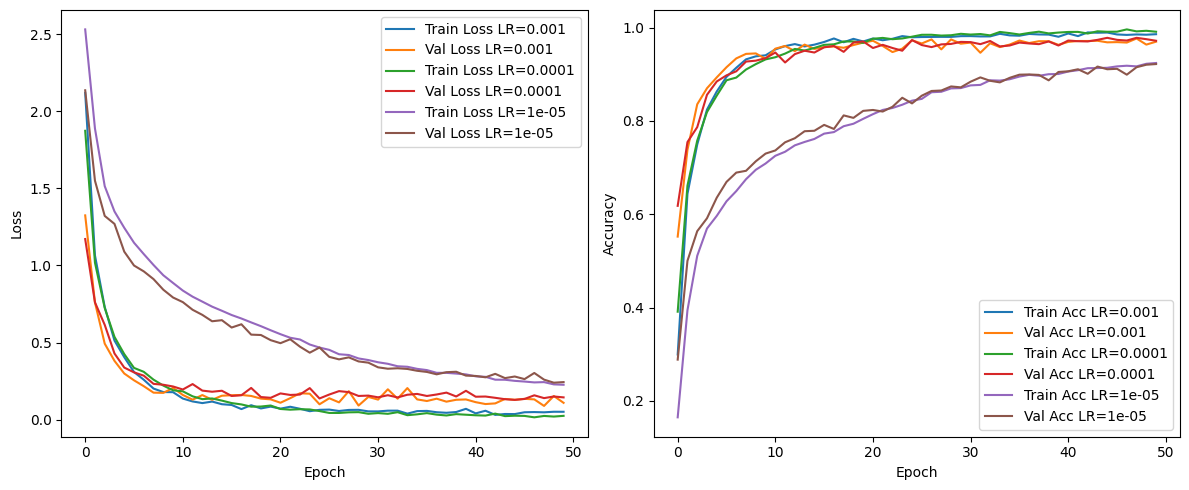

In [2]:


# Function to evaluate the model
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = loss / len(data_loader)
    accuracy = correct / total
    return avg_loss, accuracy

# Function to train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        avg_train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Set hyperparameters
num_epochs = 50
learning_rates = [1e-3, 1e-4, 1e-5]

# Initialize results dictionary
results = {}

# Loop through each learning rate
for lr in learning_rates:
    print(f'\nTraining with learning rate: {lr}')
    
    # Initialize model, criterion, and optimizer
    model = AlexNet(num_classes=15).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Train the model
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)
    
    # Evaluate on test set
    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
    
    # Store results
    results[lr] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy
    }

# Plot the results
plt.figure(figsize=(12, 5))

for lr, result in results.items():
    plt.subplot(1, 2, 1)
    plt.plot(result['train_losses'], label=f'Train Loss LR={lr}')
    plt.plot(result['val_losses'], label=f'Val Loss LR={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(result['train_accuracies'], label=f'Train Acc LR={lr}')
    plt.plot(result['val_accuracies'], label=f'Val Acc LR={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


